In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [53]:
path_dnn_renew = '../../../examples/experimental_files/fc_nl3_datFR_NEW_UTC_W_RENEW_YT1_SF1_CW2_1_W_RENEW.csv'
preds_dnn_renew = pd.read_csv(path_dnn_renew, index_col=0)


In [54]:
preds_dnn_renew

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
2021-01-01,47.333050,44.329792,41.586670,37.964676,37.969997,36.049072,39.162064,42.805347,46.810322,48.481277,...,47.318047,49.058380,53.865444,57.358673,58.594215,56.003414,50.730087,50.579548,49.483192,47.175129
2021-01-02,43.759056,42.596016,40.353844,38.110828,38.532501,42.681381,47.419071,51.155006,53.318653,52.482151,...,50.768356,53.588341,59.004097,62.138016,59.899620,55.488476,49.086662,48.711926,46.140705,45.096703
2021-01-03,46.219429,43.621643,40.791283,38.344864,36.571518,37.447395,40.387802,44.420082,48.404362,48.420071,...,49.306522,52.017151,57.574974,59.590076,59.077915,55.419994,49.120224,49.523590,47.991230,45.420734
2021-01-04,46.810276,45.015076,43.143970,40.416893,44.030365,54.393524,66.675316,71.867935,72.108688,70.224594,...,68.250198,71.481552,79.009811,79.682114,75.180832,68.719536,60.320000,58.203403,55.006584,54.463432
2021-01-05,50.220886,48.079109,45.529663,43.275143,47.026894,55.462242,65.190208,71.712296,71.778549,70.824242,...,65.085190,68.360832,74.568550,76.870491,73.231689,67.054062,59.785496,57.345932,54.641655,52.415253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
preds_dnn_renew = preds_dnn_renew.dropna(axis=0)
preds_ar_res = preds_dnn_renew.values.reshape(-1, 1).squeeze()[:-24]
preds_ar_res.shape


(6984,)

In [56]:
real = pd.read_csv('../../../examples/datasets/EPEX_FR_NEW_UTC.csv', index_col=0)
date_debut = preds_dnn_renew.index[0]
date_fin = preds_dnn_renew.index[-1]
print(date_debut, date_fin)
real_arr_res = real.loc[date_debut:date_fin, 'Price'].values.reshape(-1, 1).squeeze()
real_arr_res.shape

2021-01-01 2021-10-19


(6984,)

In [57]:
mae = np.abs(preds_ar_res - real_arr_res)
np.mean(mae)

9.403544757166815

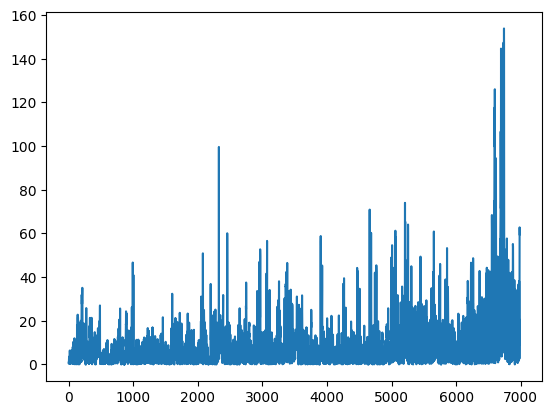

In [58]:
plt.plot(mae)